# TP 2

Autor: Baldezzari Lucas

Nota: Parte del código implementado fue otorgado por los docentes del curso.

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
#Cargo datos
data = pd.read_csv("download/ath.csv")
#print(data.head())

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

data.describe()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,CLASS
count,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,...,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000,1355663.00000
mean,0.31450,0.17009,0.18436,0.33104,0.11099,0.04861,0.05925,0.09472,0.05914,0.03002,...,-17.49897,0.12496,11.07128,0.01874,0.39039,-0.19550,-0.56245,-0.06677,-0.66674,0.00022
std,0.07524,0.06152,0.06307,0.07560,0.05847,0.02564,0.03014,0.04164,0.02900,0.02618,...,6.67495,0.11306,6.48572,0.00656,0.21590,0.07144,0.23269,0.03608,0.20415,0.01497
min,0.00000,0.00549,0.00000,0.01942,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-473.32000,0.00000,0.18000,0.00047,0.00282,-1.00558,-43.80000,-1.00558,-2.20612,0.00000
25%,0.26087,0.12658,0.14000,0.27723,0.06818,0.02985,0.03798,0.06494,0.03846,0.01205,...,-20.99000,0.04389,6.28000,0.01403,0.22896,-0.23857,-0.64634,-0.08077,-0.79565,0.00000
50%,0.31111,0.16667,0.18072,0.32857,0.10280,0.04651,0.05634,0.09091,0.05714,0.02564,...,-16.61000,0.09039,9.65000,0.01841,0.34516,-0.18902,-0.54483,-0.05926,-0.65455,0.00000
75%,0.36508,0.20988,0.22500,0.38235,0.14516,0.06452,0.07792,0.11966,0.07792,0.04412,...,-12.97000,0.17044,14.44000,0.02305,0.50871,-0.14474,-0.45000,-0.04343,-0.52258,0.00000
max,0.68627,0.55372,0.61719,0.69136,0.50820,0.25000,0.39831,0.50000,0.27586,0.34314,...,-1.37000,0.93584,92.44000,0.05700,2.43709,-0.00105,-0.00588,-0.00035,-0.00556,1.00000


In [4]:
casos = 1000 #Elijo 1000 debido a que los tiempos de ejecución se hacen largos para hacer pruebas

# Definimos una probabilidad de muestreo de forma tal que sea mucho mas probable
# muestrear un caso positivo que uno negativo
ratio = sum(data["CLASS"])/len(data)
data["weight"] = data["CLASS"].apply(lambda x: ratio if x==0 else 1)

data = data.sample(n = casos, weights=data["weight"]) #nos quedamos con la candidad de casos deseados

data["CLASS"].value_counts()

0    724
1    276
Name: CLASS, dtype: int64

In [5]:
X = data.drop(columns=["sequence_names", "CLASS", "weight"]).values
y = data["CLASS"].values
print(X.shape, y.shape)

(1000, 77) (1000,)


####  <span style="color: red;">Consulta</span>

Hemos cambiado la forma de mostrar mostrar los datos a solo 2 decimales. Por otro lado, el ratio calculado da aproximadamente _0.00022424_, por lo tanto, al aplicar _'display.float_format'_ estamos perdiendo información ya que para los casos _x==0_ veremos todos 0.00 en vez de ver el valor de _ratio_ realmente. De todos modos, a fines prácticos una probabilidad de 0.00224% podemos considerarla como 0.

Pero no me queda claro el por qué aplican

```python
lambda x: ratio if x==0 else 1
```

 si ya tenemos valores cero en CLASS.
 
 Hay algo que no estoy entendiendo.

# Validación cruzada

Haremos una validación cruzada de 5 particiones, las hacemos acá para que todas las pruebas se corran con los mismo datos. Como los datos estan muy desbalanceados, haremos una partición *estratificada*: cada partición tendrá la misma proporción de clases que los datos originales 

In [6]:
from sklearn.model_selection import StratifiedKFold

generador_particiones = StratifiedKFoldgenerador_particiones = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

particiones = list(generador_particiones.split(X, y))

##### Dividimos el set de datos para entrenar y validar

En esta sección se propone evaluar al menos dos clasificadores diferentes de los vistos en clase del encuentro 2, explorando sus hiperparámetros con la primer partición de entrenamiento.

Este es un proceso que se puede hacer internamente en la validación cruzada (y de forma automática), pero en este caso lo haremos así para poder analizar los resultados y que el procedimiento no consuma demasiado tiempo.

Revisando la documentación, encontrarán que cada método tiene muchos parametros que pueden modificarse, aunque no todos ellos afectan de igual forma al error de clasificación. Por ejemplo,

In [7]:
from sklearn.model_selection import train_test_split
# definimos la métrica para evaluar los modelos
from sklearn.metrics import f1_score

# Cargamos los datos de la primer partición de entrenamiento, para separarlos 
# en entrenamiento y optimizacion
train_ind, _ = particiones[0] # notar que "test_ind" es "_" porque no lo vamos a usar

# Ahora tendremos las particiones del esquema de arriba 
Xtrain, Xoptim, ytrain, yoptim = train_test_split(X[train_ind, :], y[train_ind], test_size=.2, stratify=y[train_ind])

print("Datos de entrenamiento", Xtrain.shape, "| datos de optimización:", Xoptim.shape)
print(f"Entrenamiento: {len(ytrain)} ({np.sum(ytrain==1)} positivos)")
print(f"Optimización: {len(yoptim)} ({np.sum(yoptim==1)} positivos)")

Datos de entrenamiento (640, 77) | datos de optimización: (160, 77)
Entrenamiento: 640 (176 positivos)
Optimización: 160 (44 positivos)


####  <span style="color: red;">Consulta</span>

![image.png](image.png)

Hemos creado 5 folds a partir de selecionar **aleatoriamente** datos desde nuestro set de datos original. Ahora bien, ¿esto no podría ser peligroso en caso de ejecutar este script varias veces? Es decir, si ejecutamos *muchas* veces 

```python
generador_particiones = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
```

en algún punto nuestros datos de entrenamiento, validación y test van a ser *vistos* por nuestro clasificador, aún si no tomamos el set _"test_ind"_.

##### Elección de modelos e hiperparámetros

En esta sección se propone evaluar al menos dos clasificadores diferentes de los vistos en clase (por ejemplo SVM y random forest), explorando sus hiperparámetros con la primer partición de entrenamiento.

Este es un proceso que se puede hacer internamente en la validación cruzada (y de forma automática), pero en este caso lo haremos así para poder analizar los resultados y que el procedimiento no consuma demasiado tiempo.

Revisando la documentación, encontrarán que cada método tiene muchos parametros que pueden modificarse, aunque no todos ellos afectan de igual forma al error de clasificación. Por ejemplo,

- SVM: El tipo de kernel y sus parámetros y el valor C
- RF: La cantidad de árboles y la cantidad de características a utilizar en cada arbol (max_features)  

En la siguiente celda hacer la busqueda de hiperparámetros para un modelo

#### Probando diferentes clasificadores

##### SVM

Se prueba primero un clasificador [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

- [Parámetros RBF de un SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [8]:
# TODO: Importar la función del clasificador a usar
from sklearn.svm import SVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.metrics import accuracy_score

from utils import plot_decision_function

hiperParams = {"kernels": ["linear", "rbf"],
    "gammaValues": [1e-2, 1e-1, 1, 1e+1, 1e+2, "scale", "auto"],
    "CValues": [8e-1,9e-1, 1, 1e2, 1e3]
    }

clasificadoresSVM = {"linear": list(),
                  "rbf": list()
    }

rbfResults = np.zeros((len(hiperParams["gammaValues"]), len(hiperParams["CValues"])))
linearResults = list()

for i, kernel in enumerate(hiperParams["kernels"]):
    
    if kernel != "linear":
        for j, gamma in enumerate(hiperParams["gammaValues"]):
            
            for k, C in enumerate(hiperParams["CValues"]):
                #Instanciamos el modelo para los hipermarametros
                model = SVC(C = C, kernel = kernel, gamma = gamma)
                
                #entreno el modelo
                model.fit(Xtrain, ytrain)
                
                #predecimos con los datos en Xoptim
                pred = model.predict(Xoptim)
                accu = f1_score(yoptim, pred)
                
                rbfResults[j,k] = accu
                
                clasificadoresSVM[kernel].append((C, gamma, model, accu))
    else:
        for k, C in enumerate(hiperParams["CValues"]):
            
            #Instanciamos el modelo para los hipermarametros
            model = SVC(C = C, kernel = kernel)
            #entreno el modelo
            model.fit(Xtrain, ytrain)
            pred = model.predict(Xoptim)
            accu = f1_score(yoptim, pred)
            linearResults.append(accu)
            #predecimos con los datos en Xoptim
            
            clasificadoresSVM[kernel].append((C, model, accu))


Grafico accuracies obtenidas

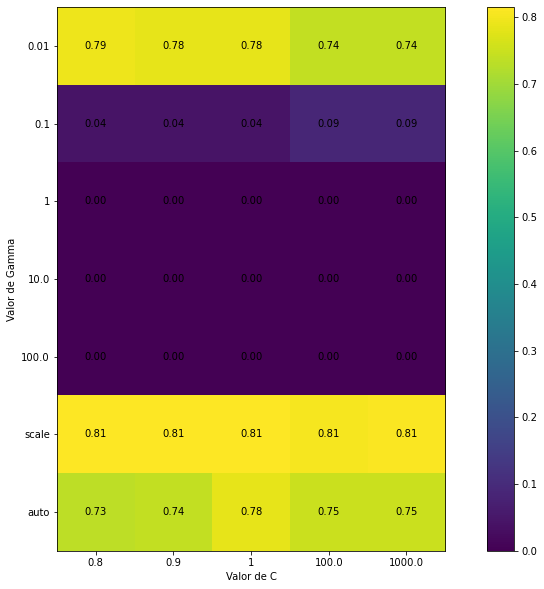

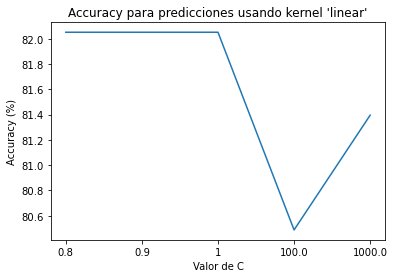

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(rbfResults)
plt.xlabel("Valor de C")
plt.xticks(np.arange(len(hiperParams["CValues"])), hiperParams["CValues"])
plt.ylabel("Valor de Gamma")
plt.yticks(np.arange(len(hiperParams["gammaValues"])), hiperParams["gammaValues"])
plt.colorbar();

for i in range(rbfResults.shape[0]):
    for j in range(rbfResults.shape[1]):
        plt.text(j, i, "{:.2f}".format(rbfResults[i, j]), va='center', ha='center')
plt.show()

num = np.arange(1,len(linearResults)+1)
plt.plot([str(C) for C in hiperParams["CValues"]], np.asarray(linearResults)*100)
plt.title("Accuracy para predicciones usando kernel 'linear'")
plt.xlabel("Valor de C") 
plt.ylabel("Accuracy (%)")
plt.show()

##### K-nn

A continuación de prueba un clasificador por [K-nn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
```python
"""
Probando un Knn
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Hiperparametros del modelo Knn

print(modelo.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None,
 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
"""
```

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#Declaro algunos hiperparametros para utilizar posteriormente
hiperParams = {"algorithms": ["ball_tree", "kd_tree"],
               "metrics": ["euclidean","chebyshev","minkowski","manhattan"],
               "weights": ["uniform","distance"]}

# hiperParams = {"algorithms": ["ball_tree"],
#                "metrics": ["euclidean"],
#                "weights": ["uniform"]}

clasificadoresKnn = {"ball_tree": list(),
                     "kd_tree": list()}

# neighborsNum = {"5": dict(), "6": dict(), "7": dict(), "8": dict(),
                # "9": dict(), "10": dict(), "11": dict(), "12": dict()}

ball_treeResults = np.zeros((len(hiperParams["metrics"]), len(hiperParams["weights"])))
kd_treeResults = np.zeros((len(hiperParams["metrics"]), len(hiperParams["weights"])))


# accuForNeighNum = {"5": dict(), "6": dict(), "7": dict(), "8": dict(),
                   # "9": dict(), "10": dict(), "11": dict(), "12": dict()}

neighborsNum = list() #Utilizaré esta lista para almacenar los clasificadoresKnn
accuForNeighNum = list() #Para almacenar los accuracies

Entreno modelos con los hiperparámetros definidos.

In [11]:
for n_neighbors in np.arange(5,11):#neighborsNum.keys():
    
    for i, algorithm in enumerate(hiperParams["algorithms"]):
        
        for j, metric in enumerate(hiperParams["metrics"]):
            
            for k, weight in enumerate(hiperParams["weights"]):
                #Instanciamos el modelo para los hipermarametros
                model = KNeighborsClassifier(n_neighbors = int(n_neighbors),
                                             weights = weight,
                                             algorithm = algorithm,
                                             metric = metric)
                #entreno el modelo
                model.fit(Xtrain, ytrain)
                
                #predecimos con los datos en Xoptim
                pred = model.predict(Xoptim)
                accu = f1_score(yoptim, pred)
                
                if algorithm == "ball_tree":
                    ball_treeResults[j,k] = accu
                    
                if algorithm == "kd_tree":
                    kd_treeResults[j,k] = accu
                
                clasificadoresKnn[algorithm].append((weight, metric,model,accu))

    # neighborsNum[n_neighbors] = clasificadoresKnn
    # accuForNeighNum[n_neighbors] = {"accu_ball_tree": ball_treeResults,
    #                                 "accu_kd_tree": kd_treeResults}
    
    neighborsNum.append(clasificadoresKnn)
    accuForNeighNum.append({"accu_ball_tree": ball_treeResults,
                            "accu_kd_tree": kd_treeResults})
    
    ball_treeResults = np.zeros((len(hiperParams["metrics"]), len(hiperParams["weights"])))
    kd_treeResults = np.zeros((len(hiperParams["metrics"]), len(hiperParams["weights"])))
    clasificadoresKnn = {"ball_tree": list(),
                     "kd_tree": list()}

Grafico los accuracies para un modelo

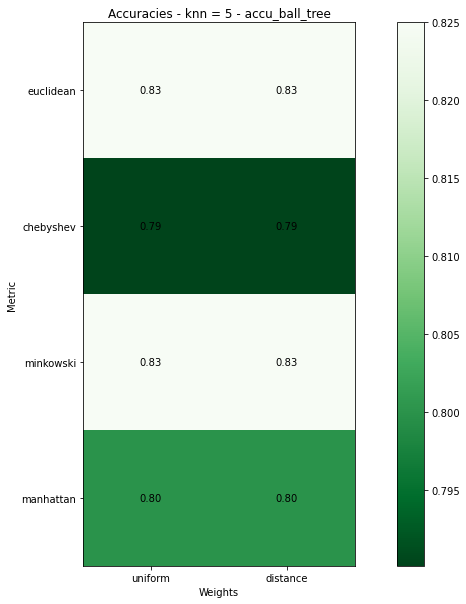

In [12]:
title = "Accuracies - knn = 5 - accu_ball_tree"

plt.figure(figsize=(15,10))
plt.title(title)
plt.imshow(accuForNeighNum[0]["accu_ball_tree"], cmap = "Greens_r")
plt.xlabel("Weights")
plt.xticks(np.arange(len(hiperParams["weights"])), hiperParams["weights"])
plt.ylabel("Metric")
plt.yticks(np.arange(len(hiperParams["metrics"])), hiperParams["metrics"])
plt.colorbar();

for i in range(accuForNeighNum[0]["accu_ball_tree"].shape[0]):
    for j in range(accuForNeighNum[0]["accu_ball_tree"].shape[1]):
        plt.text(j, i, "{:.2f}".format(accuForNeighNum[0]["accu_ball_tree"][i, j]),
                 va='center', ha='center')
        
save = False

if save:
    pathACtual = os.getcwd()
    newPath = os.path.join(pathACtual, "figs")
    os.chdir(newPath)
    plt.savefig(title, dpi = 200)
    os.chdir(pathACtual)
    
plt.show()

Grafico accuraccies para todos los modelos entrenados

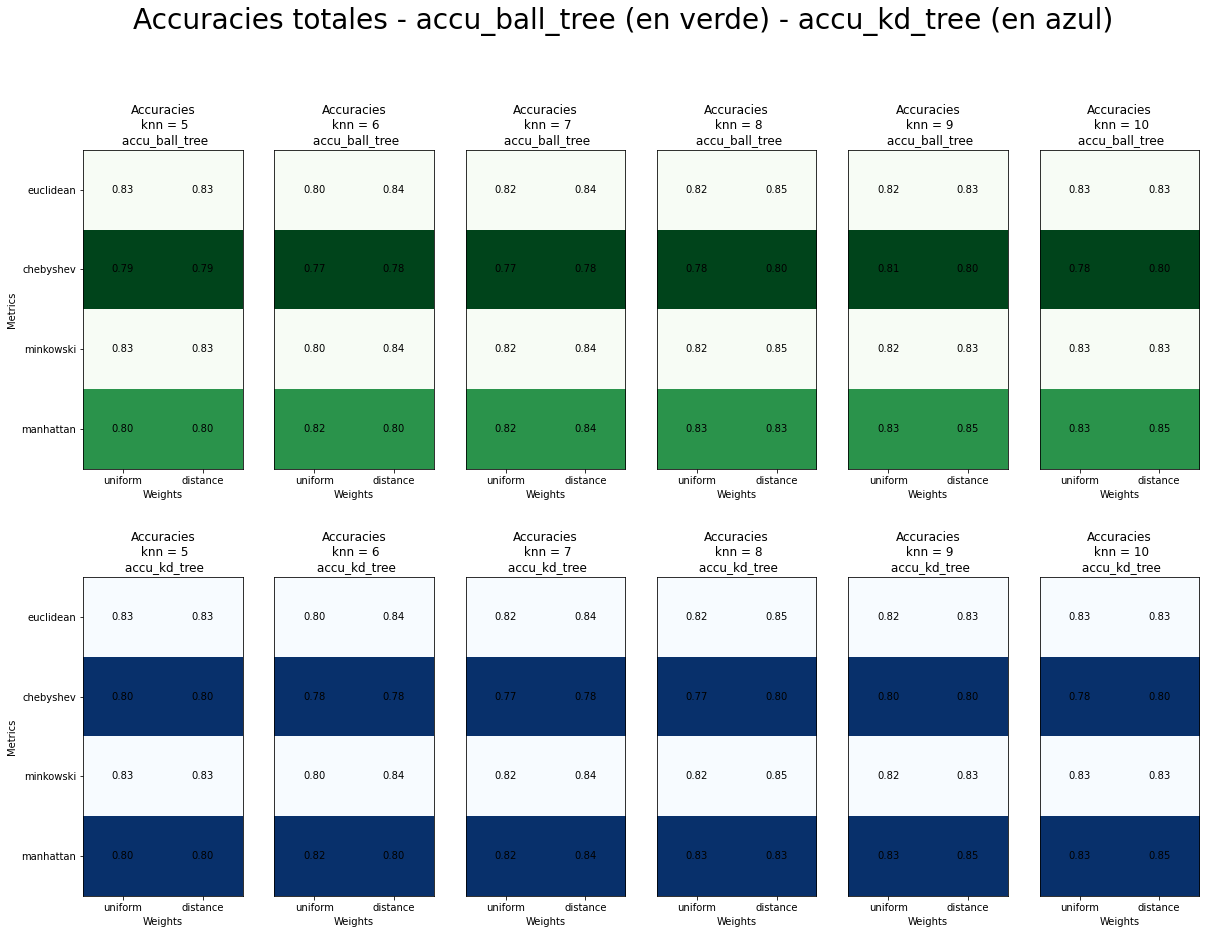

In [13]:

fig, axes = plt.subplots(2, 6, figsize=(20, 15),
                         gridspec_kw = dict(hspace=0.1, wspace=0.2))
title = "Accuracies totales - accu_ball_tree (en verde) - accu_kd_tree (en azul)"

fig.suptitle(title, fontsize=28)

axes = axes.reshape(-1)
    
for n_neighbors in np.arange(0,6):
    axes[n_neighbors].set_xlabel('Weights') 
    axes[n_neighbors+6].set_xlabel('Weights')
    if n_neighbors == 0:
        axes[n_neighbors].set_ylabel('Metrics')
        axes[n_neighbors+6].set_ylabel('Metrics')
    
    axes[n_neighbors].set_title(f"Accuracies\n knn = {n_neighbors+5}\n accu_ball_tree")
    axes[n_neighbors+6].set_title(f"Accuracies\n knn = {n_neighbors+5}\n accu_kd_tree")
    
    axes[n_neighbors].imshow(accuForNeighNum[0]["accu_ball_tree"], cmap = "Greens_r")
    axes[n_neighbors+6].imshow(accuForNeighNum[0]["accu_kd_tree"], cmap = "Blues_r")

    axes[n_neighbors].set_xticks(np.arange(len(hiperParams["weights"])))
    axes[n_neighbors+6].set_xticks(np.arange(len(hiperParams["weights"])))
    
    axes[n_neighbors].set_xticklabels(hiperParams["weights"])
    axes[n_neighbors+6].set_xticklabels(hiperParams["weights"])
    
    if n_neighbors == 0:
        axes[n_neighbors].set_yticks(np.arange(len(hiperParams["metrics"])))
        axes[n_neighbors].set_yticklabels(hiperParams["metrics"])
        axes[n_neighbors+6].set_yticks(np.arange(len(hiperParams["metrics"])))
        axes[n_neighbors+6].set_yticklabels(hiperParams["metrics"])
    else:
        axes[n_neighbors].yaxis.set_visible(False)
        axes[n_neighbors+6].yaxis.set_visible(False)
        
    for i in range(accuForNeighNum[n_neighbors]["accu_ball_tree"].shape[0]):
        for j in range(accuForNeighNum[n_neighbors]["accu_ball_tree"].shape[1]):
            axes[n_neighbors].text(j, i, "{:.2f}".format(accuForNeighNum[n_neighbors]["accu_ball_tree"][i, j]),
                     va='center', ha='center') 
            
    for i in range(accuForNeighNum[n_neighbors]["accu_kd_tree"].shape[0]):
        for j in range(accuForNeighNum[n_neighbors]["accu_kd_tree"].shape[1]):
            axes[n_neighbors+6].text(j, i, "{:.2f}".format(accuForNeighNum[n_neighbors]["accu_kd_tree"][i, j]),
                     va='center', ha='center') 

if save:
    pathACtual = os.getcwd()
    newPath = os.path.join(pathACtual, "figs")
    os.chdir(newPath)
    plt.savefig(title, dpi = 200)
    os.chdir(pathACtual)

plt.show()

###### Comparando clasificadores

Voy a seleccionar algunos modelos en base a los resultados previos para comparar los clasificadores.

In [14]:

"""
Comparando clasificadores
"""
# TQDM muestra una barra de avance a medida que pasan las iteraciones 
from tqdm import tqdm

# Vamos a analizar varias métricas
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

#Selecciono dos clasificadores SVM
modeloSVM1 = clasificadoresSVM["linear"][3][1] #modelo 3 con [Model = SVC(C=100.0, kernel='linear'), accu = 0.811]

gamma = 0.8
C = "scale"

for values in clasificadoresSVM["rbf"]:
    if values[0] == gamma and values[1] == C:
        modeloSVM2 = values[2] #modelo 2 es un SVM con kernel = rbf

#Selecciono dos clasificadores KNN
#Modelo KNN 1
n_neighbors = 9
algorithms = "ball_tree"
metric = "euclidean"
weight = "distance"

neighborsNum[n_neighbors-5][algorithms]

for values in neighborsNum[n_neighbors-5][algorithms]:
    if values[0] == weight and values[1] == metric:
        modeloKNN1 = values[2]
    
#Modelo KNN 2
n_neighbors = 9
algorithms = "kd_tree"
metric = "minkowski"
weight = "distance"

neighborsNum[n_neighbors-5][algorithms]

for values in neighborsNum[n_neighbors-5][algorithms]:
    if values[0] == weight and values[1] == metric:
        modeloKNN2 = values[2]

#Lista modelos
# modelos = [modeloSVM1, modeloSVM2, modeloKNN1, modeloKNN2]

modelos = {"SVM1": modeloSVM1,
           "SVM2": modeloSVM2,
           "KNN1": modeloKNN1,
           "KNN2": modeloKNN2}

generalResults = []

for train_ind, test_ind in tqdm(particiones): 
    for modelo in modelos: # TODO completar con todos los modelos a usar
            
        # if nombre_modelo == "modelo_1":
        #     # TODO: instanciar el modelo con los hiperparámetros que dieron mejor en el análisis previo
        #     modelo = # ...
        # if nombre_modelo == "modelo_2":
        #     # TODO: instanciar el modelo con los hiperparámetros que dieron mejor en el análisis previo
        #     modelo = # ...

        # # notar que ahora X[train_ind, :] contiene a Xtrain y Xoptim del punto 
        # # anterior
        modelos[modelo].fit(X[train_ind, :], y[train_ind])

        # La siguietne predicción se hace sobre datos que no fueron vistos antes
        pred = modelos[modelo].predict(X[test_ind, :])

        generalResults.append([modelo,
                               accuracy_score(y[test_ind], pred),
                               f1_score(y[test_ind], pred),
                               recall_score(y[test_ind], pred),
                               precision_score(y[test_ind], pred)])

generalResults = pd.DataFrame(generalResults, columns=["modelo", "acc", "f1", "pre", "rec"])
generalResults

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:31<00:00, 30.38s/it]


,modelo,acc,f1,pre,rec
0,SVM1,0.92000,0.84615,0.78571,0.91667
1,SVM2,0.90500,0.80412,0.69643,0.95122
2,KNN1,0.90500,0.80412,0.69643,0.95122
3,KNN2,0.90500,0.80412,0.69643,0.95122
4,SVM1,0.90000,0.80000,0.72727,0.88889
5,SVM2,0.90500,0.80808,0.72727,0.90909
6,KNN1,0.91000,0.82000,0.74545,0.91111
7,KNN2,0.91000,0.82000,0.74545,0.91111
8,SVM1,0.91000,0.81633,0.72727,0.93023
9,SVM2,0.90000,0.79167,0.69091,0.92683


Grafico datos obtenidos para comparar los modelos.

<ipython-input-15-bf03bd426d7c>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


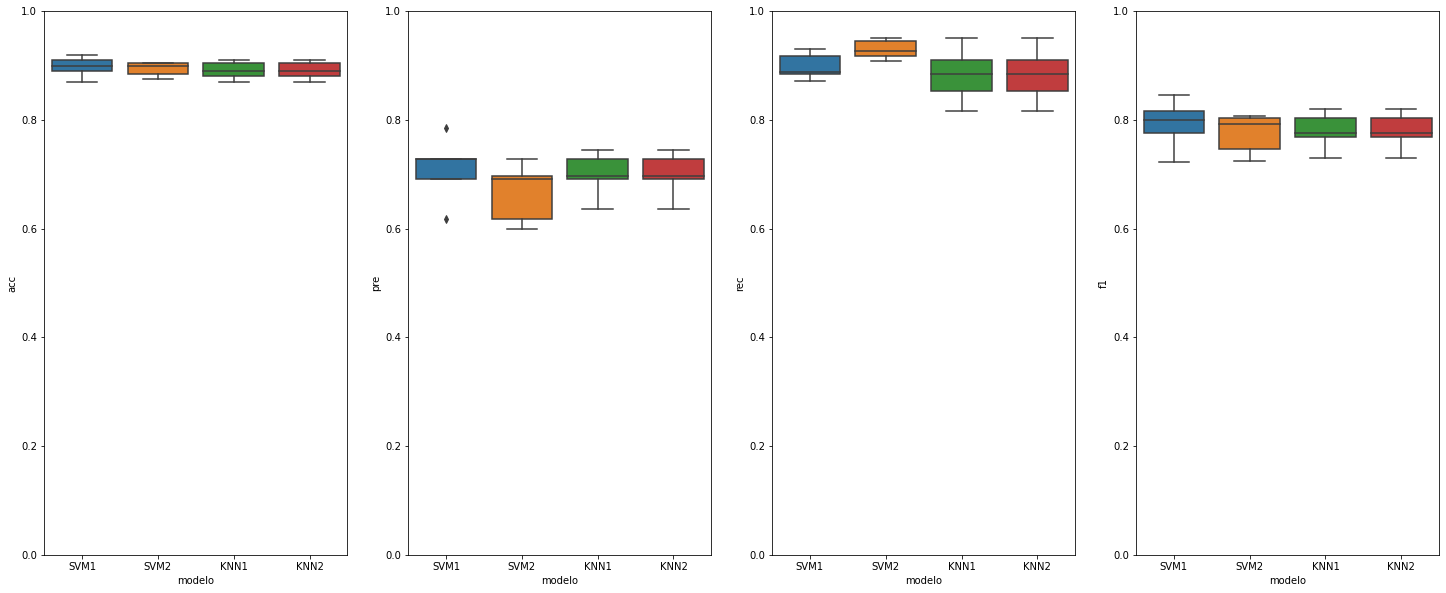

In [15]:
import seaborn

fig, ax = plt.subplots(1, 4, figsize=(25, 10),
                       gridspec_kw = dict(hspace=0.1, wspace=0.2))

for k, metric in enumerate(["acc", "pre", "rec", "f1"]):
    seaborn.boxplot(data=generalResults, y=metric, x="modelo", ax=ax[k])
    ax[k].set_ylim([0, 1])
plt.tight_layout()

####  <span style="color: red;">Consulta</span>

Estuve graficando diferentes arreglos del set de datos otorgado. Pero honestamente no entiendo qué estoy clasificando. Es decir, entiendo qué hacen y cómo hacen los métodos SVM y K-nn para entrenarse y clasficiar posteriormente, pero honestamente no entiendo el set de datos.

Finalmente decirles que me pareció muy interesante el enfoque de este TP.

Saludos.